In [1]:
#Code 3: This file of code deals with supervised learning and includes the code for Linear regression, Ridge and LASSO +elastic net regularisation, KNN regressor and RandomForest Regressor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from mlxtend.plotting import plot_learning_curves
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

/Users/saiveephatak/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


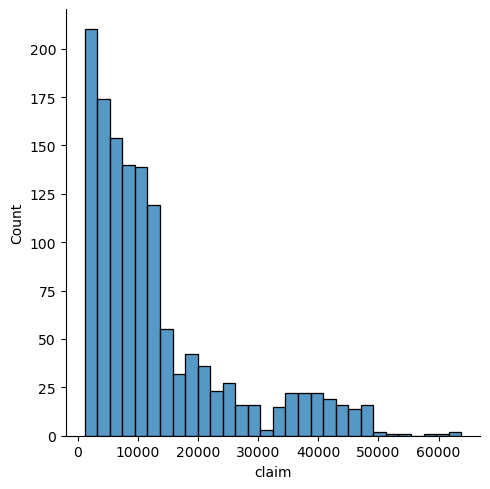

In [2]:
#import food dataset
insurance_data = pd.read_csv('/Users/saiveephatak/Desktop/OPSM322/Individual project/Insurance data numeric.csv')
insurance_data.pop('index')
insurance_data.pop('PatientID')

sns.displot(x = 'claim', data = insurance_data)

#clean the data
insurance_final = insurance_data.dropna()


In [3]:
#Here we can see that the claim is not normally distributed. However, this should not matter, since we are running regression on this dataset.

In [4]:
#divide the labels into the dependent variable and the independent variables.
insurance_label = insurance_final['claim']
#make into dummy variables 
insurance_features = pd.get_dummies(insurance_final, columns=['gender','diabetic','smoker', 'region'], drop_first=True).astype(int)
insurance_features.pop('claim')


0        1121
1        1131
7        1146
8        1149
9        1163
        ...  
1335    55135
1336    58571
1337    60021
1338    62592
1339    63770
Name: claim, Length: 1332, dtype: int64

In [5]:
#check for multicolinearity 
vif_data = pd.DataFrame()
vif_data["Feature"] = insurance_features.columns
vif_data["VIF"] = [variance_inflation_factor(insurance_features.values, i) for i in range(insurance_features.shape[1])]
vif_data

,Feature,VIF
0,age,12.282662
1,bmi,24.598266
2,bloodpressure,35.340584
3,children,1.818598
4,gender_male,2.256084
5,diabetic_Yes,1.891133
6,smoker_Yes,1.438820
7,region_northwest,2.415167
8,region_southeast,2.974668
9,region_southwest,2.336631


In [6]:
#While I did try removing blood pressure from my regression model, I saw that this had no significant impact on any of the models. Hence I decided to keep all the variables.

In [7]:
#split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(insurance_features, insurance_label, test_size = 0.15, random_state = 100)
y_train.shape
X_train.shape

(1132, 10)

In [8]:
#run linear regression
reg = LinearRegression()
reg_model = reg.fit(X_train, y_train)
print('Intercept: ',reg_model.intercept_)
list(zip(insurance_features, reg_model.coef_))

Intercept:  -22518.752022882945


[('age', 7.993499651806869),
 ('bmi', 336.9662871768776),
 ('bloodpressure', 233.8060881057255),
 ('children', 715.7431799217605),
 ('gender_male', -19.56903499740031),
 ('diabetic_Yes', -33.36345726809188),
 ('smoker_Yes', 20604.63021773182),
 ('region_northwest', -1547.3830377984434),
 ('region_southeast', -2333.577453340701),
 ('region_southwest', -1843.7959390891065)]

In [9]:
#calculate RMSE
y_pred = reg_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', rmse)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print('R-squared:', r_squared)

Root Mean Squared Error (RMSE): 6522.4302457064905
R-squared: 0.7037869432034283


In [10]:
#Linear regression: RMSE=6522.43024, R^2=0.703786943

In [11]:
#Ridge regression
#running grid search CV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_reg = Ridge()

grid_search_ridge = GridSearchCV(estimator=ridge_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search_ridge.fit(X_train, y_train)
print("Best Parameters - Ridge:", grid_search_ridge.best_params_)
print("Best Estimator - Ridge:", grid_search_ridge.best_estimator_)
best_ridge_model = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge_model.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print('Root Mean Squared Error (RMSE) - Best Ridge Model:', rmse_ridge)
r_squared_ridge = r2_score(y_test, y_pred_ridge)
print('R-squared - Ridge:', r_squared_ridge)

Best Parameters - Ridge: {'alpha': 1}
Best Estimator - Ridge: Ridge(alpha=1)
Root Mean Squared Error (RMSE) - Best Ridge Model: 6526.212651208356
R-squared - Ridge: 0.703443291307726


In [12]:
#Ridge regression: RMSE=6526.2126, R^2=0.703443
#Here, for ridge regression, the R squared actually became slightly lower than the linear regression model. This can be due to the model's ability to be generalisable.

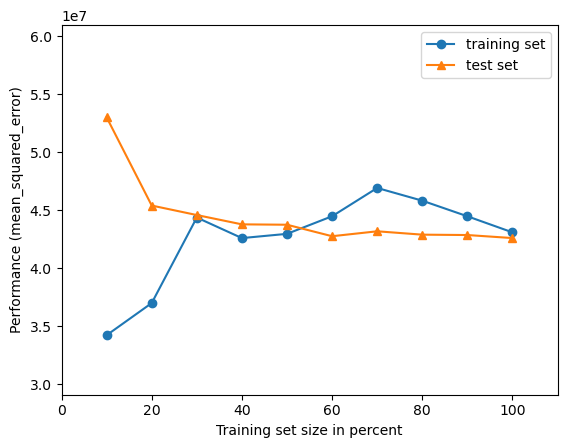

In [13]:
plot_learning_curves(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,clf=best_ridge_model,scoring="mean_squared_error",print_model=False)
plt.show()

In [14]:
#Here, we can see that a 70-30 is probably the ideal split in this data, since that is where the training and testing set provide the closest RMSEs to each other.

In [15]:
#LASSO
#running grid search CV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_reg = Lasso()

grid_search_lasso = GridSearchCV(estimator=lasso_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search_lasso.fit(X_train, y_train)
print("Best Parameters - Ridge:", grid_search_lasso.best_params_)
print("Best Estimator - Ridge:", grid_search_lasso.best_estimator_)
best_lasso_model = grid_search_lasso.best_estimator_
y_pred_lasso = best_lasso_model.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print('Root Mean Squared Error (RMSE) - Best Lasso Model:', rmse_lasso)
r_squared_lasso = r2_score(y_test, y_pred_lasso)
print('R-squared - Lasso:', r_squared_lasso)


Best Parameters - Ridge: {'alpha': 10}
Best Estimator - Ridge: Lasso(alpha=10)
Root Mean Squared Error (RMSE) - Best Lasso Model: 6539.84544460444
R-squared - Lasso: 0.7022030255617658


In [16]:
#Lasso regression: RMSE=6539.84544, R^2=0.702203
#For Lasso, the score has become slightly less than that of ridge regression as well. This indicates that lasso, when dealing with the multicollinearity, is probably decreasing the overall result of the model.

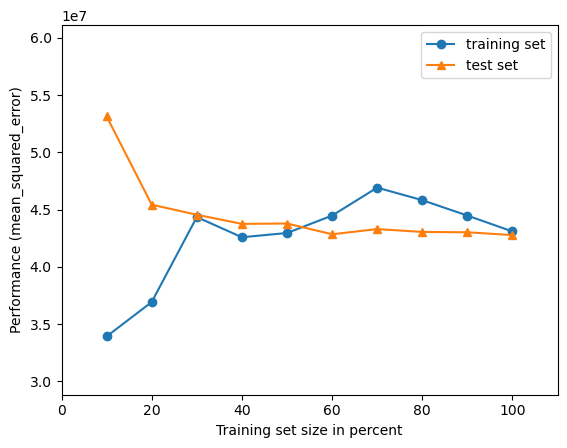

In [17]:
plot_learning_curves(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,clf=best_lasso_model,scoring="mean_squared_error",print_model=False)
plt.show()

In [18]:
#Here, we can see that a 70-30 is probably the ideal split in this data, since that is where the training and testing set provide the closest RMSEs to each other.

In [19]:
#Elastic Net
#running Grid search CV
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

elastic_net = ElasticNet()
grid_search_elastic_net = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search_elastic_net.fit(X_train, y_train)

print("Best Parameters - Elastic Net:", grid_search_elastic_net.best_params_)
print("Best Estimator - Elastic Net:", grid_search_elastic_net.best_estimator_)

best_elastic_net_model = grid_search_elastic_net.best_estimator_
y_pred_elastic_net = best_elastic_net_model.predict(X_test)

rmse_elastic_net = np.sqrt(mean_squared_error(y_test, y_pred_elastic_net))
print('Root Mean Squared Error (RMSE) - Best Elastic Net Model:', rmse_elastic_net)

r_squared_elastic_net = r2_score(y_test, y_pred_elastic_net)
print('R-squared - Best Elastic Net Model:', r_squared_elastic_net)


Best Parameters - Elastic Net: {'alpha': 0.01, 'l1_ratio': 0.9}
Best Estimator - Elastic Net: ElasticNet(alpha=0.01, l1_ratio=0.9)
Root Mean Squared Error (RMSE) - Best Elastic Net Model: 6526.747751981636
R-squared - Best Elastic Net Model: 0.7033946584364945


In [20]:
#Elastic regression: RMSE=6526.7477, R^2=0.7033946
#Elastic net provides the highest R^2 value out of all the models run so far. It is a combination of both Ridge and Lasso, and is the most optimal solution till now.


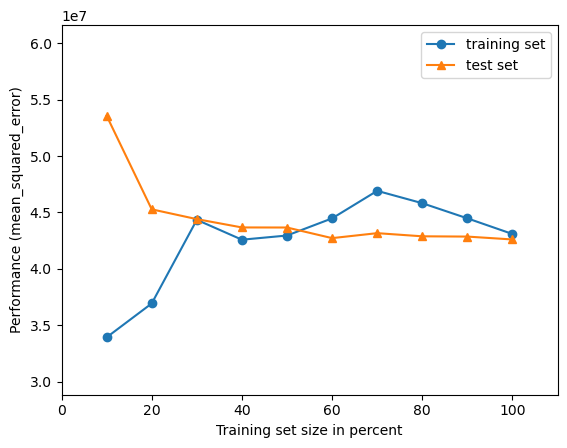

In [21]:
plot_learning_curves(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,clf=best_elastic_net_model,scoring="mean_squared_error",print_model=False)
plt.show()


In [22]:
#Here, we can see that a 70-30 is probably the ideal split in this data, since that is where the training and testing set provide the closest RMSEs to each other.

In [23]:
#KNN regressor with Grid CV search
param_grid = {
    'n_neighbors': list(range(5, 21)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn_regressor = KNeighborsRegressor()
grid_search_knn = GridSearchCV(estimator=knn_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search_knn.fit(X_train, y_train)

print("Best Parameters - KNN Regressor:", grid_search_knn.best_params_)
print("Best Estimator - KNN Regressor:", grid_search_knn.best_estimator_)

best_knn_model = grid_search_knn.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)

rmse_knn_best = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print('Root Mean Squared Error (RMSE) - Best KNN Regressor:', rmse_knn_best)

r_squared_knn_best = r2_score(y_test, y_pred_knn)
print('R-squared - Best KNN Regressor:', r_squared_knn_best)

Best Parameters - KNN Regressor: {'n_neighbors': 17, 'p': 1, 'weights': 'distance'}
Best Estimator - KNN Regressor: KNeighborsRegressor(n_neighbors=17, p=1, weights='distance')
Root Mean Squared Error (RMSE) - Best KNN Regressor: 8927.465290249616
R-squared - Best KNN Regressor: 0.44506559376617083


In [24]:
#KNN regressor: RMSE=8927.4652, R^2=0.44506
#here, the KNN regressor is not particularly helpful, providing a low R squared score despite doing a grid search to find the best parameters.

In [25]:
#Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print('Root Mean Squared Error (RMSE) - Random Forest:', rmse_rf)
r_squared_rf = r2_score(y_test, y_pred_rf)
print('R-squared - Random Forest Regressor:', r_squared_rf)

Root Mean Squared Error (RMSE) - Random Forest: 4957.273089297052
R-squared - Random Forest Regressor: 0.8288917301617555


In [27]:
#Random forest regressor: RMSE=4957.2730, R^2=0.82889
#The random forest regressor surprisingly gives me the highest R squared accuracy. The random forest model has been able to capture the non linear relationship between the dependent and independent variables. It has best been able to deal with the outliers, and provide a result that is suitable without overfitting.

In [29]:
#Ultimately, I will use random forest regressor on this dataset. Due to computational limitations, I could not find the best parameters for RF Regressor. I feel like finding the best parameters might even increase the accuracy more. 
#The Elastic Net also performed quite well, and would by my second choice to run on this dataset. 
#The KNN Regressor provided the most unfavourable result, as it could not adapt well to the features of the dataset.